## Exercise 3. Approximate eigenvalues of a matrix (Challenge)

---

In [11]:
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'

It is possible to use some of the algorithms implemented previously in order to compute the eigenvalues of some symmetric matrix. Consider for $N \geq 2$ the matrix
$$
A=\left(\begin{array}{cccccc}
2 & -1 & 0 & \ldots & 0 & 0 \\
-1 & 2 & -1 & \ldots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \ldots & -1 & 2
\end{array}\right)
$$
which comes from the discretization of the Laplace operator in dimension one. This matrix is symmetric and therefore has real eigenvalues. The goal of this exercise is to be able to approximate some of them.

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 1</td>
</tr>
</table>

---
For each $i=1,2,\ldots,n$, let $D_i$ denote the closed disk in the complex plane centered at $a_{ii}$ with radius $R_i$, where
$$
R_{i} = \sum_{j \neq i}^n |a_{ij}|
$$

Then, every eigenvalue of $A$ lies within at least one of the disks $D_1,D_2,\ldots,D_n$.

In the case of the matrix $A$ given in the problem, we have $a_{ii}=2$ for all $i$, and $a_{i,i-1}=a_{i-1,i}=-1$ for $i=2,3,\ldots,N$. Therefore, the Gershgorin disks are
\begin{align*}
D_1 &= {z\in\mathbb{C}:|z-2|\leq 1}, \
D_i &= {z\in\mathbb{C}:|z-2|\leq 1+1} = {z\in\mathbb{C}:|z-2|\leq 2},\quad i=2,3,\ldots,N-1, \
D_N &= {z\in\mathbb{C}:|z-2|\leq 1}.
\end{align*}
Therefore, every eigenvalue of $A$ lies within at least one of the disks $D_1,D_2,\ldots,D_N$. Since these disks all have center $2$ and radius $2$, they all lie in the interval $[0,4]$.

Hence, we conclude that every eigenvalue of $A$ belongs to the interval $[0,4]$, as desired.

---


In [53]:
# Answer to Question 2

import numpy as np

N = 10  # choose a reasonably large value of N
diagonal = 2 * np.ones(N)
off_diagonal = -1 * np.ones(N-1)
A = np.diag(diagonal) + np.diag(off_diagonal, k=-1) + np.diag(off_diagonal, k=1)

# compute the eigenvalues of A using NumPy
eigenvalues = np.linalg.eigvalsh(A)

# print the eigenvalues
# round to 3 decimal places
print(A)
print('The eigenvalues are: \n', np.round(eigenvalues, 5))


[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
The eigenvalues are: 
 [0.08101 0.31749 0.69028 1.16917 1.71537 2.28463 2.83083 3.30972 3.68251
 3.91899]


We can see that all the eigenvalues are in the interval $[0,4]$.

---

Choose an interval around one of the observed eigenvalues and perform a search for the minimizer of the functions
$$
f(t)=|\operatorname{det}(A-t I)| \text { and } g(t)=\log f(t) .
$$

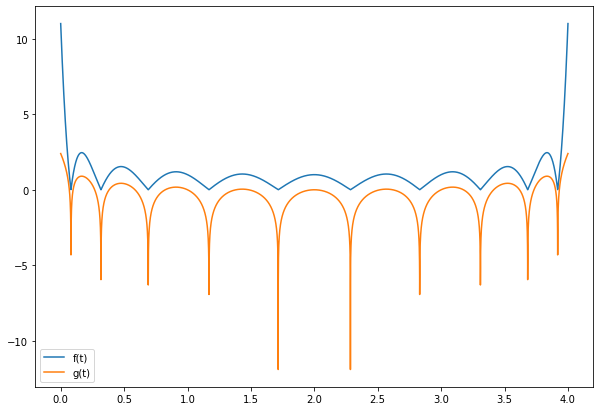

In [54]:
import scipy.optimize

# define the functions we want to minimize
def f(t):
    return abs(np.linalg.det(A - t * np.identity(N)))

def g(t):
    return np.log(f(t))

# plot f(t) and g(t) for t in [0, 4]
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 10000)
plt.figure(figsize=(10, 7))
ft = [f(t) for t in x]
gt = [g(t) for t in x]
plt.plot(x, ft, label='f(t)')
plt.plot(x, gt, label='g(t)')
plt.legend()
plt.show()

In [56]:
a = 2.0  # initial lower bound
b = 2.4  # initial upper bound
maxN = 10000  # max number of function evaluations
nfeval = 0  # counter for function evaulations
variant = 1  # change the function
Tol = 1e-4  # desired tolerance
va = f(a)  # initial values for the function
vb = f(b)
ga = g(a)
gb = g(b)


def Bisection(fun, A, B, tol=1e-6, ubFeval=10):
    nfeval = 0
    lbhist = []
    ubhist = []
    xmidhist = []
    lb = A
    ub = B
    lbhist.append(lb)
    ubhist.append(ub)
    while ub - lb > tol:
        xmid = (lb + ub) / 2
        # the compute the derivative
        df = (fun(xmid + tol) - fun(xmid)) / tol
        if df >= 0:
            ub = xmid
        else:
            lb = xmid
        lbhist.append(lb)
        ubhist.append(ub)
        xmidhist.append(xmid)
        nfeval += 1
        if nfeval > ubFeval:
            break
    return lbhist, ubhist, xmidhist, nfeval


lbhist, ubhist, xmidhist, nfeval = Bisection(f, a, b, tol=Tol, ubFeval=maxN)
lbhist_, ubhist_, xmidhist_, nfeval_ = Bisection(g, a, b, tol=Tol, ubFeval=maxN)
# print the results
print('The minimum is at t = ', xmidhist[-1])
print('The minimum is at f(t) = ', f(xmidhist[-1]))
print('------------------------------------')
print('The minimum is at t = ', xmidhist_[-1])
print('The minimum is at g(t) = ', g(xmidhist_[-1]))

The minimum is at t =  2.28466796875
The minimum is at f(t) =  0.00021496172606537992
------------------------------------
The minimum is at t =  2.28466796875
The minimum is at g(t) =  -8.445050563984308


<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer to Question 3 and 4</td>
</tr>
</table>

---
Here we set $N=10$ in the matrix and we have the following eigenvalues:
```python
[0.08101 0.31749 0.69028 1.16917 1.71537 2.28463 2.83083 3.30972 3.68251, 3.91899]
```
Then I choose the interval from $[2.0, 2.4]$ in order to target the eigenvalue $2.28463$. Since from the definition of characteristic polynomial, we know that the when $t$ equals to eigenvalues, the determinant of $A-tI$ is zero, then $f(t)=|\operatorname{det}(A-t I)|$ reach the minimum value since it's non-negative. We apply the bisection method to find the eigenvalue. The result is:
```python
The minimum is at t =  2.28466796875
The minimum is at f(t) =  0.00021496172606537992
------------------------------------
The minimum is at t =  2.28466796875
The minimum is at g(t) =  -8.445050563984308
```
The result is very close to the eigenvalue $2.28463$. And since $\log$ is a monotonically increasing function, $f(t)$ and $g(t)$ have the same minimizer. My method is above 5-digit accuracy, we can imporve it by using the Newton's method or increase the iteration times.

Also, since the value of $f(t)$ is really close to 0, **any inaccuracy in the computation of $f(t)$ will be amplified by the logarithm. Therefore, the result of $g(t)$ is not very accurate.**

---
